In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

In [174]:
data = pd.read_csv('zomato.csv')
data.shape

(51717, 17)

In [175]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [177]:
data['votes'].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

In [178]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [179]:
# explore columns related to the addrress
data.loc[:,['address','location','listed_in(city)']].sample(8,random_state=1)

,address,location,listed_in(city)
8157,"2A/3, 15th Cross, Green Garden Layout, Shirdi ...",Marathahalli,Brookefield
32498,"18, Shreenidhi Arcade, Maruthi Nagar Main Road...",BTM,Koramangala 6th Block
4679,"56, Near Passport Office, Outer Ring Road, Bel...",Bellandur,Bellandur
2445,"14/6, 9th Main Road, Opposite Water Tank, 100 ...",BTM,Bannerghatta Road
27316,"321/3A, Sharif Complex, Hosur Main Road, Oppos...",Hosur Road,Koramangala 4th Block
2735,"4/5, 5th Cross, Laxmi Road, Shanti Nagar, Bang...",Shanti Nagar,Basavanagudi
34577,"9, Maruthi Nagar, Madiwala, BTM, Bangalore",BTM,Koramangala 6th Block
32233,"13th cross, 16th main, Tavarekere Main Road, B...",BTM,Koramangala 6th Block


In [180]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [181]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [182]:
# check for duplicate values
print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   9809


In [183]:
# drop the duplicates
data.drop_duplicates(inplace=True)

In [184]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

In [185]:
# check for unique values in the rate column
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [186]:
# removed 'NEW' and '-' from rate coloumn and put NaN value.
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

In [187]:
# chcek again data.rate coloumn. we can see nan values.
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [188]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [189]:
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           14.11
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

In [190]:
## apply takes a function and applies it to all values of pandas series.

data['rate'] = data['rate'].astype(str)

## removed all '/5' and replace with ''
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))

## convert rate to float
data['rate'] = data['rate'].apply(lambda r: float(r))

In [191]:
data['rate'].head(2)

0    4.1
1    4.1
Name: rate, dtype: float64

In [192]:
data.name.value_counts().head()

name
Cafe Coffee Day      92
Onesta               85
Empire Restaurant    71
Just Bake            67
Kanti Sweets         66
Name: count, dtype: int64

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

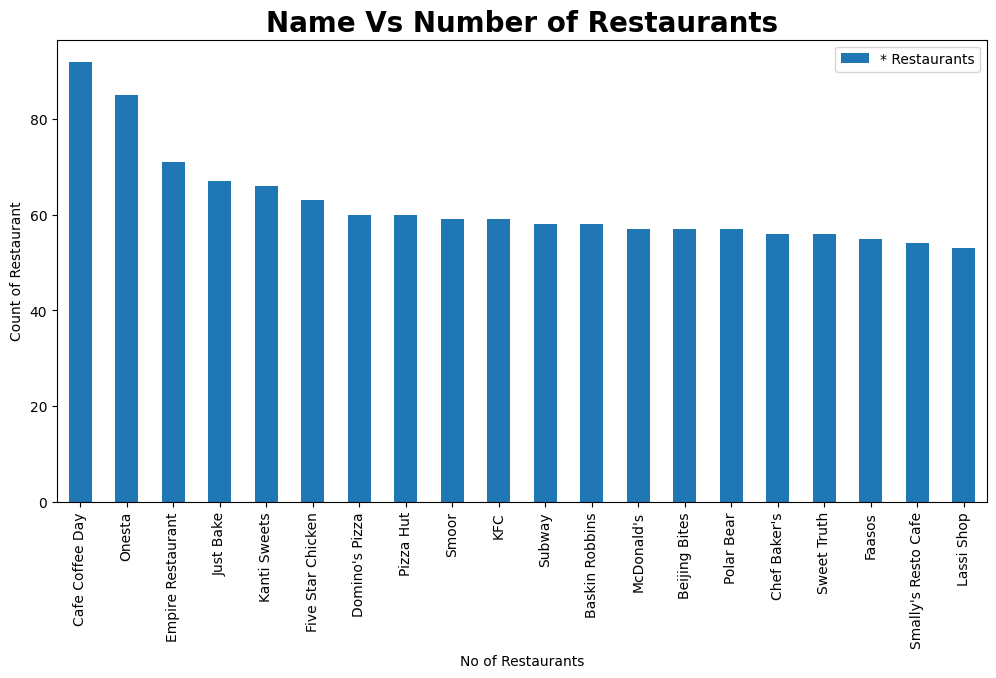

In [193]:
plt.figure(figsize=(12,6))
ax =data.name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

online_order
Yes    26566
No     15342
Name: count, dtype: int64

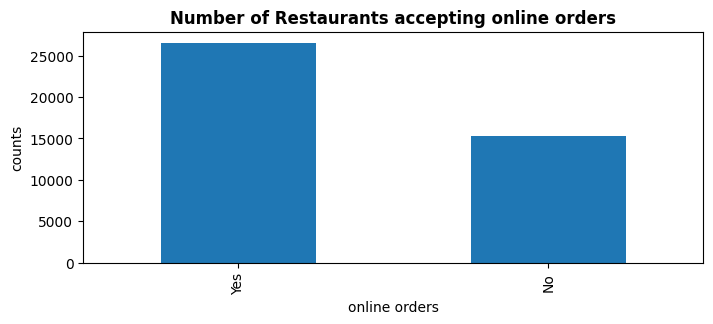

In [194]:
plt.figure(figsize=(8,3))
ax =data.online_order.value_counts().plot(kind='bar')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')
plt.ylabel('counts')

data.online_order.value_counts()

book_table
No     35843
Yes     6065
Name: count, dtype: int64

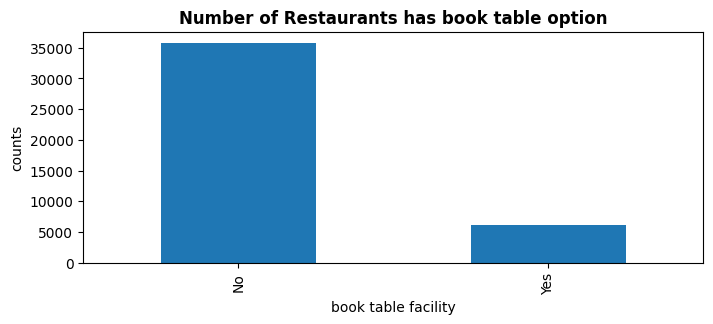

In [195]:
plt.figure(figsize=(8,3))
ax =data.book_table.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')

data.book_table.value_counts()

Text(0.5, 1.0, 'Location')

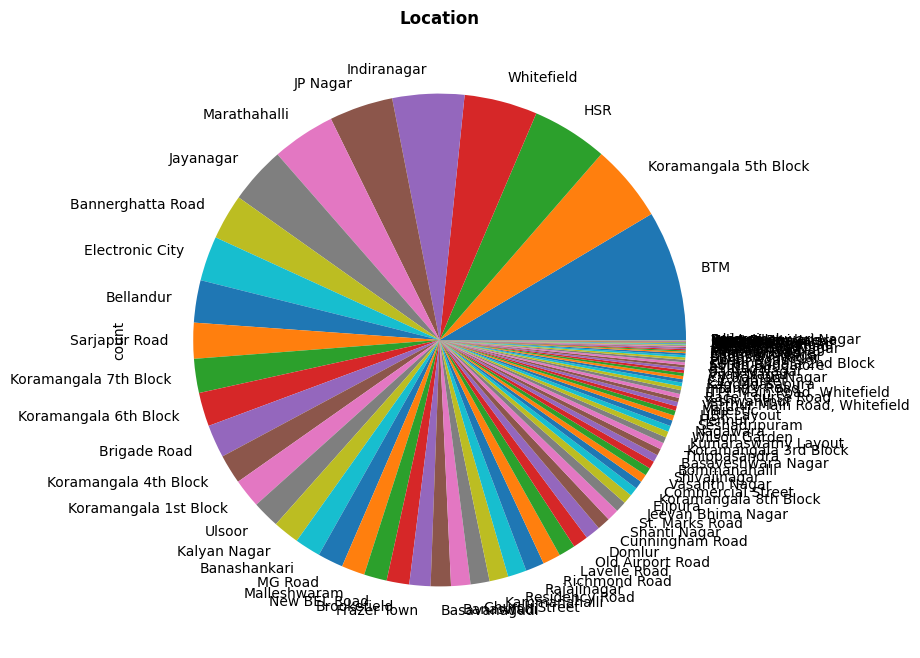

In [196]:
plt.figure(figsize=(8,8))
ax =data.location.value_counts().plot(kind='pie')
plt.title('Location', weight='bold')

Text(0.5, 1.0, 'Location')

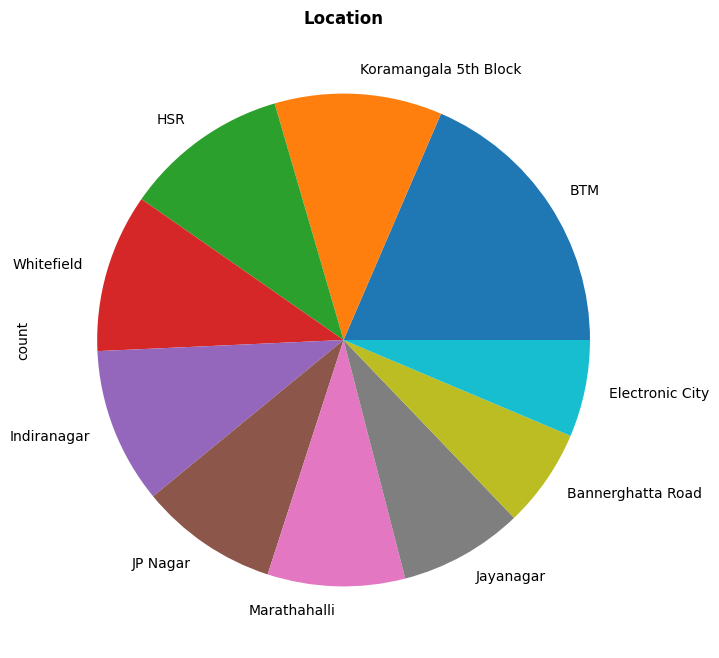

In [197]:
plt.figure(figsize=(8,8))
ax =data.location.value_counts()[:10].plot(kind='pie')
plt.title('Location', weight='bold')

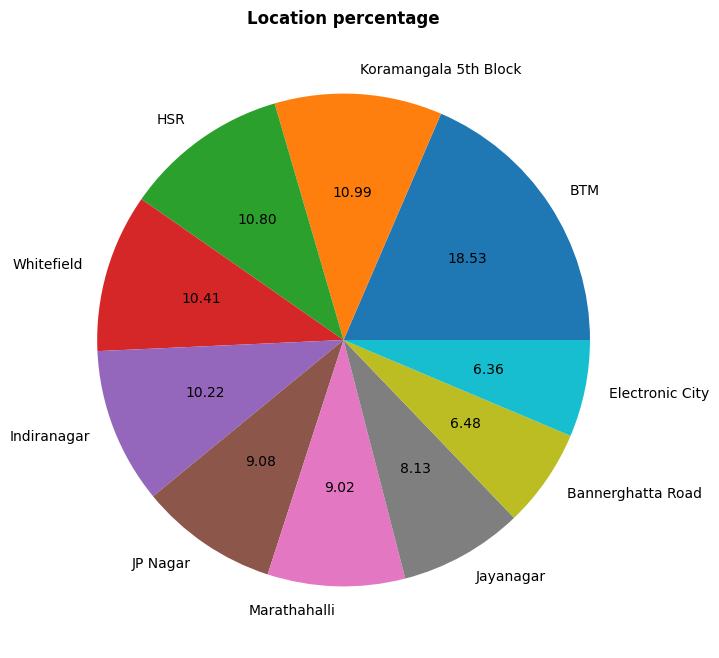

In [198]:
plt.figure(figsize=(8,8))
values = data.location.value_counts()[:10]
labels = data['location'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Location percentage', weight='bold')
plt.show()

Text(0, 0.5, 'counts')

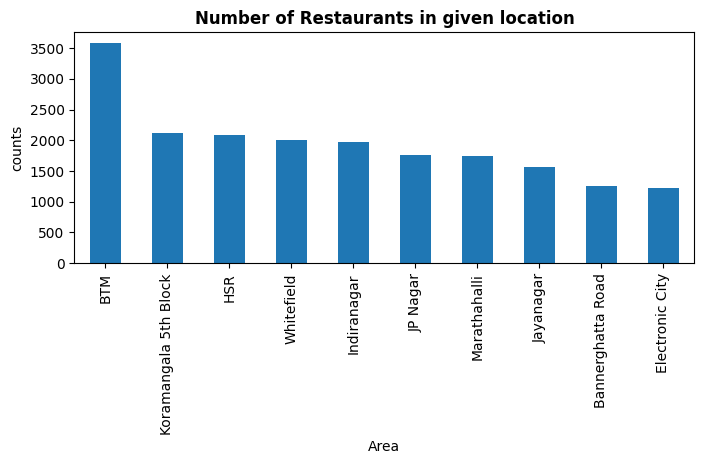

In [199]:
plt.figure(figsize=(8,3))
ax =data.location.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

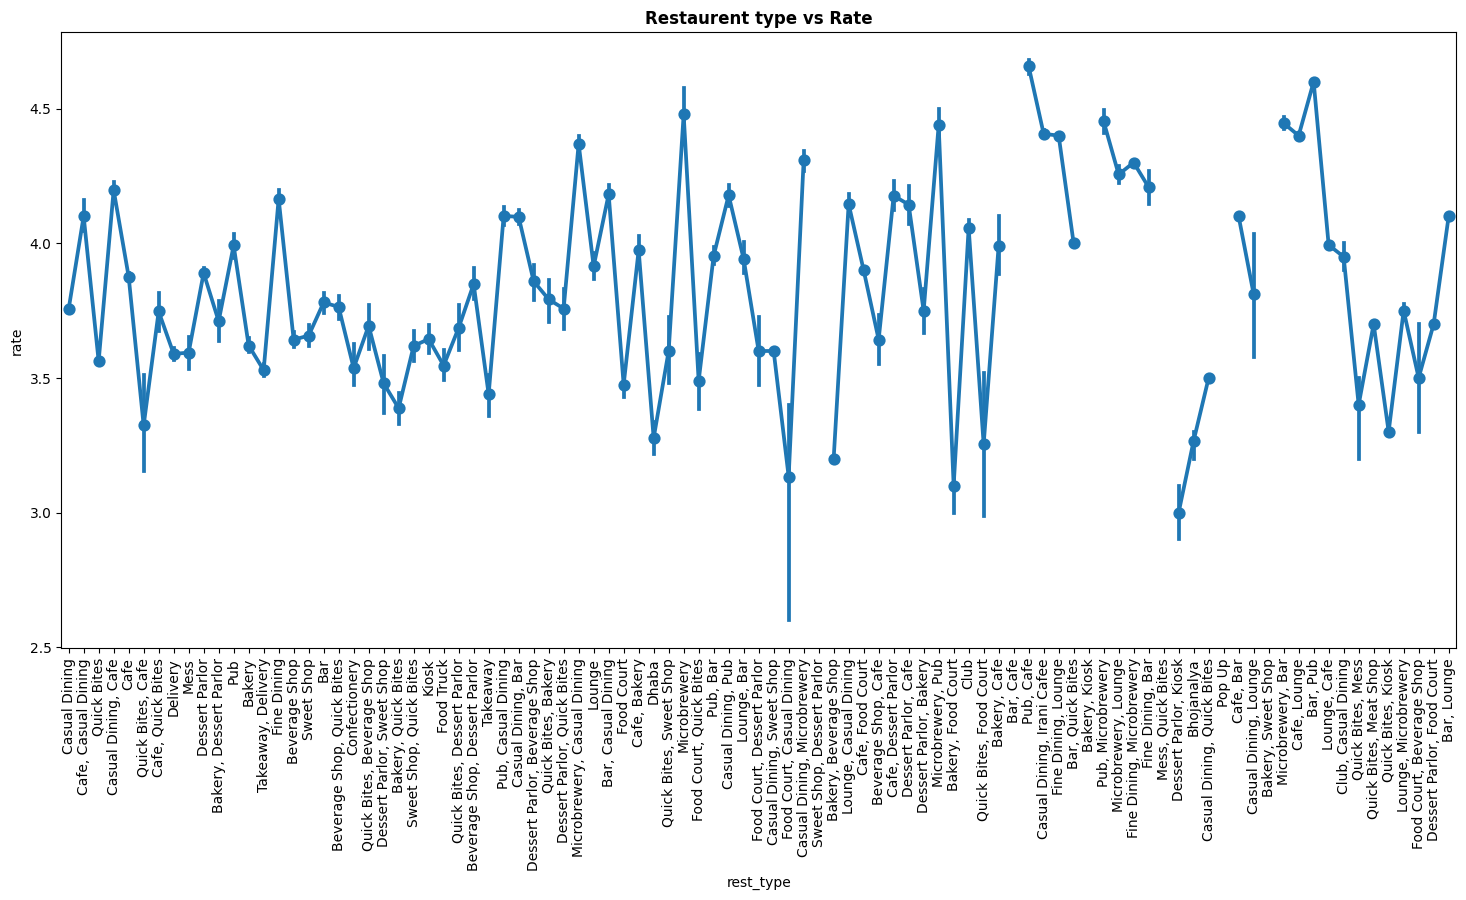

In [200]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

In [201]:
cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [202]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

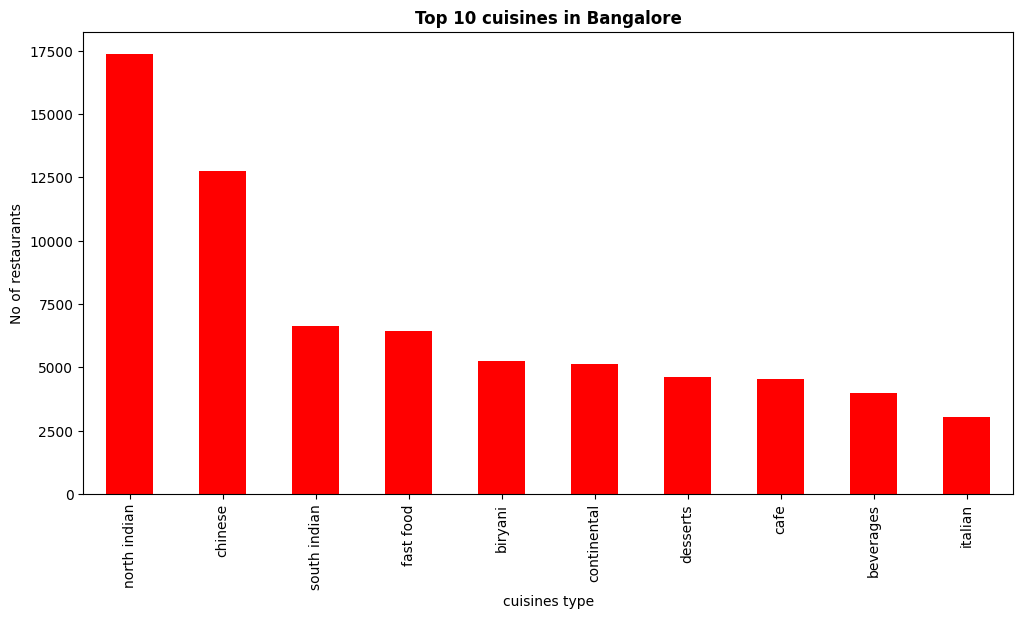

In [203]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

In [204]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars
51713,Vinod Bar And Restaurant,False,False,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars


In [205]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [206]:
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()


rest_type
Bites Quick       14611
Casual Dining      9068
Cafe               3143
Delivery           1966
Dessert Parlor     1868
Name: count, dtype: int64

In [207]:
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

cuisines
Indian North                         2305
Chinese Indian North                 2211
Indian South                         1350
Chinese Indian Indian North South    1136
Bakery Desserts                       863
Name: count, dtype: int64

In [208]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",Chinese Indian Mughlai North,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Chinese Indian North Thai,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,True,False,3.8,918,Banashankari,Cafe Casual Dining,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",Cafe Italian Mexican,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet


In [209]:
# build x & y dataset
x = data.drop(['rate','name'],axis = 1)
y = data['rate']

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [ ]:
dump(X_train, 'pkl_files/more_feature_X_train')
dump(X_test, 'pkl_files/more_feature_X_test')
dump(y_train, 'pkl_files/more_feature_y_train')
dump(y_test, 'pkl_files/more_feature_y_test')

In [ ]:
X_train = load('pkl_files/more_feature_X_train')
X_test = load('pkl_files/more_feature_X_test')
y_train = load('pkl_files/more_feature_y_train')
y_test = load('pkl_files/more_feature_y_test')

In [212]:
X_train.head(2)

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
781,True,False,5,Basavanagudi,Bar Casual Dining,NaN,Biryani Chinese Indian Indian North South,800,[],[],Dine-out
4028,True,True,715,Sarjapur Road,Casual Dining,"Pasta, Pizza, Enchiladas, Mushroom Soup, Salad...",Italian Pizza,"1,500","[('Rated 2.0', ""RATED\n Went today for an imp...",[],Delivery


In [213]:
X_train =X_train.drop(['location','rest_type','cuisines'],axis = 1)
X_test =X_test.drop(['location','rest_type','cuisines'],axis = 1)

In [214]:
X_train.head(3)

,online_order,book_table,votes,dish_liked,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
781,True,False,5,NaN,800,[],[],Dine-out
4028,True,True,715,"Pasta, Pizza, Enchiladas, Mushroom Soup, Salad...","1,500","[('Rated 2.0', ""RATED\n Went today for an imp...",[],Delivery
7338,True,False,42,NaN,150,"[('Rated 4.0', ""RATED\n It's very nice place ...","['Chicken Cheese Grilled Sandwich', 'Chicken C...",Delivery


In [215]:
print(x.shape)
print(y.shape)

(41908, 11)
(41908,)


In [216]:
X_train.shape, y_train.shape

((29335, 8), (29335,))

In [217]:
X_test.shape, y_test.shape

((12573, 8), (12573,))

In [ ]:
dump(X_train, 'max_features_pkl/more_feature_X_train')
dump(X_test, 'max_features_pkl/more_feature_X_test')
dump(y_train, 'max_features_pkl/more_feature_y_train')
dump(y_test, 'max_features_pkl/more_feature_y_test')

In [ ]:
X_train= load('max_features_pkl/more_feature_X_train') 
X_test= load('max_features_pkl/more_feature_X_test')
y_train= load('max_features_pkl/more_feature_y_train')
y_test= load('max_features_pkl/more_feature_y_test')

In [ ]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mse(y_test, y_pred_lr)